# Part One: Data Exploration


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from plotnine import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
data = pd.DataFrame(data)
data.head(1)

,age,sex,bmi,smoker,region,charges
0,19,female,27.9,yes,southwest,16884.924


In [ ]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])
data.head(1)

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,16884.924,1,0,0,1,0,0,0,1


In [ ]:
data.isna().sum()

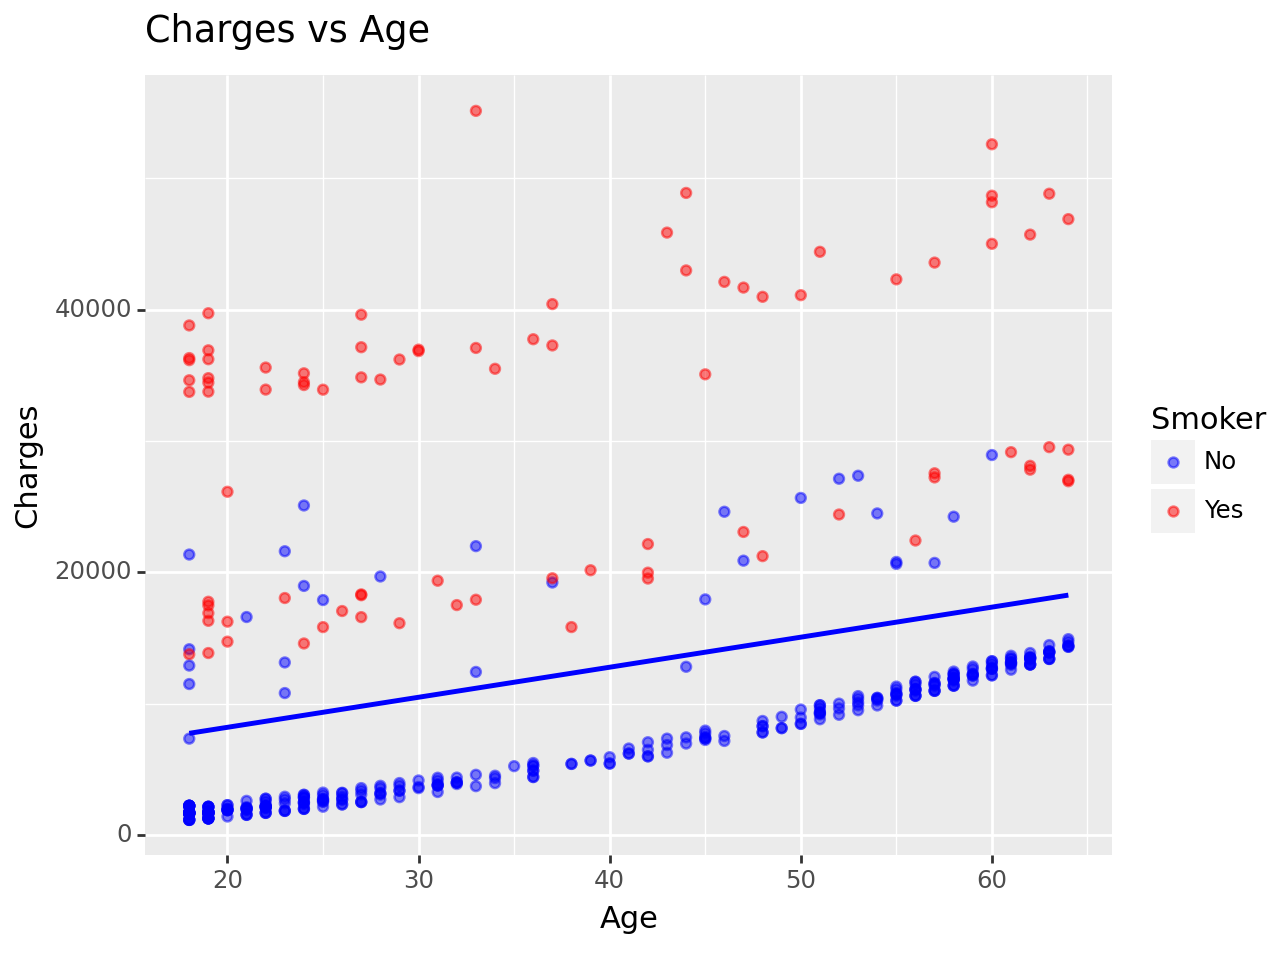

<Figure Size: (640 x 480)>

In [ ]:
plot1 = (
    ggplot(data, aes(x='age', y='charges')) +
    geom_point(aes(color='factor(smoker_yes)'), alpha=0.5) +
    geom_smooth(method='lm', color='blue', se=False) +
    labs(title='Charges vs Age', x='Age', y='Charges')+
    scale_color_manual(name='Smoker', values={0: 'blue', 1: 'red'}, labels=['No', 'Yes'])

)
plot1


Charges vs Age:

This scatter plot shows the relationship between age and charges, with different colors representing smokers and non-smokers.
We can see a positive correlation between age and charges, meaning that as age increases, charges tend to increase as well.
The blue line represents the linear regression fit, which shows the overall trend in the data.
It is also evident that smokers tend to have higher charges compared to non-smokers.

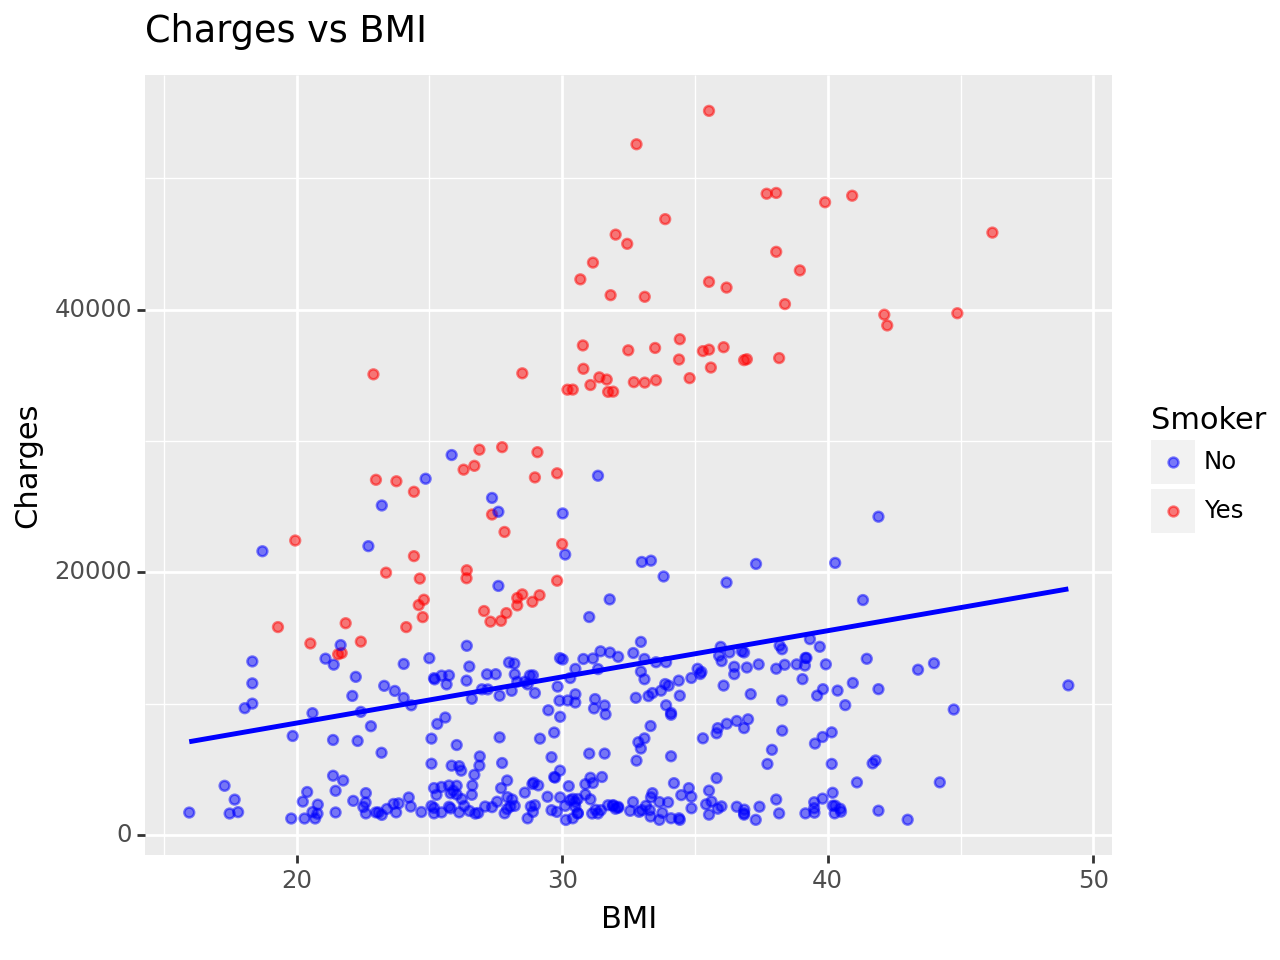

<Figure Size: (640 x 480)>

In [ ]:
# Plot 2: Charges vs BMI
plot2 = (
    ggplot(data, aes(x='bmi', y='charges')) +
    geom_point(aes(color='factor(smoker_yes)'), alpha=0.5) +
    geom_smooth(method='lm', color='blue', se=False) +
    labs(title='Charges vs BMI', x='BMI', y='Charges')+
    scale_color_manual(name='Smoker', values={0: 'blue', 1: 'red'}, labels=['No', 'Yes'])

)
plot2

Charges vs BMI:

This scatter plot shows the relationship between body mass index (BMI) and charges, with different colors representing smokers and non-smokers.
There is a positive correlation between BMI and charges, meaning that as BMI increases, charges tend to increase as well.
The blue line represents the linear regression fit, which shows the overall trend in the data.
Similar to the first plot, smokers tend to have higher charges compared to non-smokers.

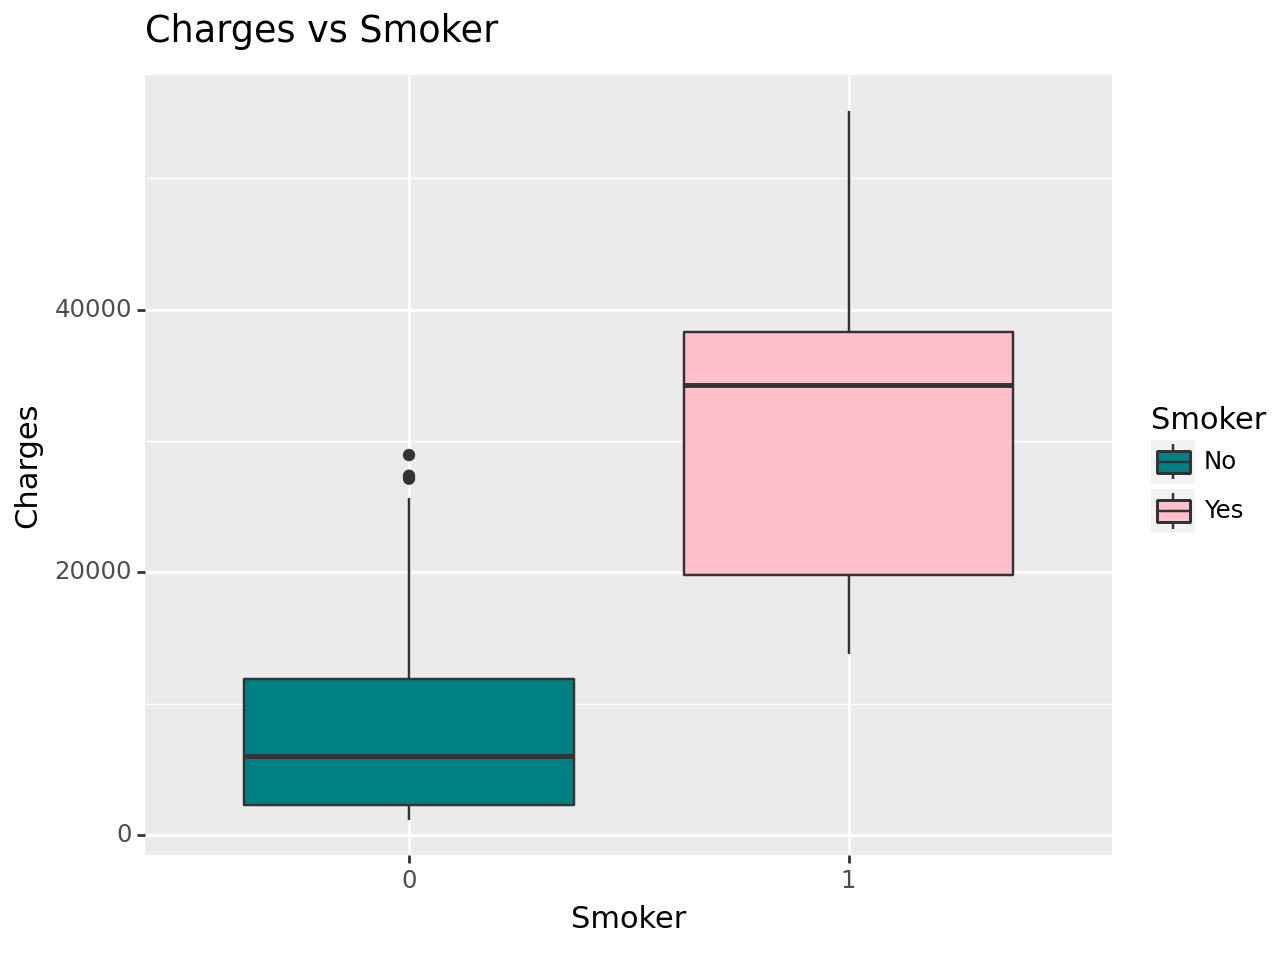

<Figure Size: (640 x 480)>

In [ ]:
plot3 = (
    ggplot(data, aes(x='factor(smoker_yes)', y='charges')) +
    geom_boxplot(aes(fill='factor(smoker_yes)')) +
    labs(title='Charges vs Smoker', x='Smoker', y='Charges')+
    scale_fill_manual(name='Smoker', values={0: 'teal', 1: 'pink'}, labels=['No', 'Yes'])

)
plot3


Charges vs Smoker:

This box plot shows the distribution of charges for smokers and non-smokers.
It is evident that smokers tend to have higher charges compared to non-smokers. The median charge for smokers is much higher than the median charge for non-smokers.

# Part Two: Simple Linear Models

## linear model with age as a predictor

In [ ]:
# step 1 split tha data
# Define X and y
X = data[["age"]]  # you need to add 2 brackets since it is a pandas data frame
y = data["charges"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # always specify the test size

In [ ]:
# prepping your preprocessing
lr = LinearRegression()

In [ ]:
my_pipeline1 = Pipeline([("ols",lr)])

In [ ]:
fitted1 = my_pipeline1.fit(X_train, y_train)

In [ ]:
y_preds1= fitted1.predict(X_test)

In [ ]:
r2_score(y_test, y_preds1)

0.11811361342088

In [ ]:
fitted1.named_steps['ols'].coef_[0]

206.31131684012303

In [ ]:
mean_squared_error(y_test, y_preds1)

147663521.22089645


The model's R-squared value of 0.11 indicates a weak fit when predicting insurance charges based solely on age. However, the positive coefficient of 206 suggests that insurance charges increase by 206 units for each additional year of age. This implies that while age has a role in determining insurance charges, other factors are also at play and should be considered for a more accurate prediction.

## Linear model with age and sex as predictors

In [ ]:
# step 1 split tha data
# Define X and y
X = data[["age","sex_female"]]  # you need to add 2 brackets since it is a pandas data frame
y = data["charges"]



In [ ]:
# prepping your preprocessing
lr = LinearRegression()

In [ ]:
my_pipeline2 = Pipeline([("ols",lr)])

In [ ]:
fitted2 = my_pipeline2.fit(X_train, y_train)

In [ ]:
y_preds2= fitted2.predict(X_test)

In [ ]:
r2_score(y_test, y_preds2)

0.09120237887035498

In [ ]:
mean_squared_error(y_test, y_preds2)

151990308.81792986

In [ ]:
fitted2.named_steps['ols'].coef_[0]

201.1555075127099

In [ ]:
fitted2.named_steps['ols'].coef_[1]

-549.627702351936

The model's R-squared value of 0.0912 indicates that it poorly explains the variability in insurance charges, with age and sex accounting for only approximately 9.12% of the variation. For every additional year of age, insurance charges increase by 201 units. However, being female is associated with a decrease of approximately 549.62 units in charges compared to being male.

## Linear model that does not include sex, but does include smoker

In [ ]:
# Step 1: Split the data
X = data[["age", "smoker_yes"]]
y = data["charges"]
# use random state to keep it consistent X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# Step 2: Prepping the preprocessing
lr = LinearRegression()
my_pipeline3 = Pipeline([("ols", lr)])
fitted3 = my_pipeline3.fit(X_train, y_train)

In [ ]:
# Step 3: scoring
y_preds3 = fitted3.predict(X_test)

In [ ]:
# Step 4:scoring
r2_score(y_test, y_preds3)

0.8065814446672434

In [ ]:
# Step 5: Coefficient estimates
mean_squared_error(y_test, y_preds3)

27352787.784298655

In [ ]:
# Step 6: Coefficient estimates
coef_age_3 = fitted3.named_steps['ols'].coef_[0] # first coeffient
coef_smoker_yes_3 = fitted3.named_steps['ols'].coef_[1] # second coeffient

In [ ]:
coef_age_3

247.9686414297061

In [ ]:
coef_smoker_yes_3

23783.237823558204

The model demonstrates a strong relationship between the predictors and the response variable, with an R-squared value of 0.8065, indicating that approximately 80.65% of the variability in insurance charges is explained by age and smoker status. The coefficient for age, 247.968, suggests that with each additional year of age, insurance charges increase by approximately 247.97 units. Similarly, the coefficient for smoker status, 23783, indicates that smokers have insurance charges that are approximately 23,783 units higher than non-smokers, all else being equal.

**Which is the best model?**


Model 3, with predictors age and smoker status, demonstrates superior predictive performance, evidenced by a higher R-squared of 0.8065 and a lower MSE of 27,352,787, compared to Model 2, which includes age and sex and has an R-squared of 0.0912 and MSE of 151,990,308.

# Part Three: Multiple Linear Models

## model that uses age and bmi as predictors

In [ ]:
# step 1 split tha data
# Define X and y
X = data[["age","bmi"]]  # you need to add 2 brackets since it is a pandas data frame
y = data["charges"]


In [ ]:
# prepping your preprocessing
lr = LinearRegression()

In [ ]:
my_pipeline4 = Pipeline([("ols",lr)])

In [ ]:
fitted4 = my_pipeline4.fit(X_train, y_train)

In [ ]:
y_preds4= fitted4.predict(X_test)

In [ ]:
r2_score(y_test, y_preds4)

0.06020781052370827

In [ ]:
fitted4.named_steps['ols'].coef_[0]

188.5969807371321

In [ ]:
fitted4.named_steps['ols'].coef_[1]

397.0142296906959

In [ ]:
mean_squared_error(y_test, y_preds5)

125363183.83275712

Model 2, which includes age and sex as predictors, has an R-squared of 9.12% and a mean squared error (MSE) of 151,990,308. On the other hand, Model 4, which includes age and BMI as predictors, has a lower R-squared of 6.20% but a better (lower) MSE of 125,363,183.

## model that uses age and age^2 as predictors

In [ ]:
# step 1 split tha data
# Define X and y
X = data[["age"]]  # you need to add 2 brackets since it is a pandas data frame
y = data["charges"]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100) # always specify the test size
# random_state=100 this keeps at 100

In [ ]:
# prepping your preprocessing
lr = LinearRegression()
ct= ColumnTransformer([("square",PolynomialFeatures(degree=2, include_bias=False),["age"])])

In [ ]:
my_pipeline5 = Pipeline([("quadratic",ct),("ols",lr)])

In [ ]:
fitted5 = my_pipeline5.fit(X_train, y_train)

In [ ]:
y_preds5= fitted5.predict(X_test)

In [ ]:
r2_score(y_test, y_preds5)

0.13088423011745265

In [ ]:
fitted5.named_steps['ols'].coef_[0]

107.98983051952281

In [ ]:
fitted5.named_steps['ols'].coef_[1]

1.2723743408574328

In [ ]:
mean_squared_error(y_test, y_preds5)

122818861.50490658

Model 5 with age squared has an MSE of 122,818,861 and an R-squared of 0.130, compared to Model 1 with just age, which has an MSE of 147,663,521 and an R-squared of 0.1181. While the quadratic effect improves explanatory power, it does not significantly improve the model's fit.

## polynomial model of degree 4

In [ ]:
# step 1 split tha data
# Define X and y
X = data[["age"]]  # you need to add 2 brackets since it is a pandas data frame
y = data["charges"]



In [ ]:
# prepping your preprocessing
lr = LinearRegression()
ct= ColumnTransformer([("square",PolynomialFeatures(degree=4, include_bias=False),["age"])])

In [ ]:
my_pipeline6 = Pipeline([("quadratic",ct),("ols",lr)])

In [ ]:
fitted6 = my_pipeline6.fit(X_train, y_train)

In [ ]:
y_preds6= fitted6.predict(X_test)

In [ ]:
r2_score(y_test, y_preds6)

0.12560843063572258

In [ ]:
fitted6.named_steps['ols'].coef_[0]

-4966.497490246093

In [ ]:
fitted6.named_steps['ols'].coef_[1]

241.22445844174982

In [ ]:
mean_squared_error(y_test, y_preds6)

170506595.53392527

Model 1 (age) has a lower MSE (147,663,521) and a slightly lower R-squared (0.1181) compared to Model 6 (polynomial degree 4), which has a higher MSE (170,506,595.5) and a slightly higher R-squared (0.1256).

## polynomial model of degree 12

In [ ]:
# step 1 split tha data
# Define X and y
X = data[["age"]]  # you need to add 2 brackets since it is a pandas data frame
y = data["charges"]


In [ ]:
# prepping your preprocessing
lr = LinearRegression()
ct= ColumnTransformer([("square",PolynomialFeatures(degree=12, include_bias=False),["age"])])

In [ ]:
my_pipeline7 = Pipeline([("quadratic",ct),("ols",lr)])

In [ ]:
fitted7 = my_pipeline7.fit(X_train, y_train)

In [ ]:
y_preds7= fitted7.predict(X_test)

In [ ]:
r2_score(y_test, y_preds7)

0.09214465943043859

In [ ]:
fitted7.named_steps['ols'].coef_[0]

-8.662166799595375e-10

In [ ]:
fitted7.named_steps['ols'].coef_[1]

1.4322432533797491e-05

In [ ]:
mean_squared_error(y_test, y_preds7)

168742343.2534567

Model 7, with an MSE of 120,969,831 and R-squared of 0.1231, performs better than Model 1, which has a higher MSE of 147,663,521 and a lower R-squared of 0.1181.

**Best model?**
Model 7 is the best model as it has the lowest MSE (120,969,831) and a relatively high R-squared value (0.1231).

**Plot**
plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

In [ ]:
# Create a DataFrame with test data and predictions
test_data = pd.DataFrame({'age': X_test['age'], 'y_preds7': y_preds7})
test_data

,age,y_preds7
376,18,8298.399598
42,59,15613.508530
372,42,12701.159463
170,43,12807.700443
254,64,18864.710406
...,...,...
94,19,8202.670094
66,27,9291.989417
184,53,14094.825111
153,18,8298.399598


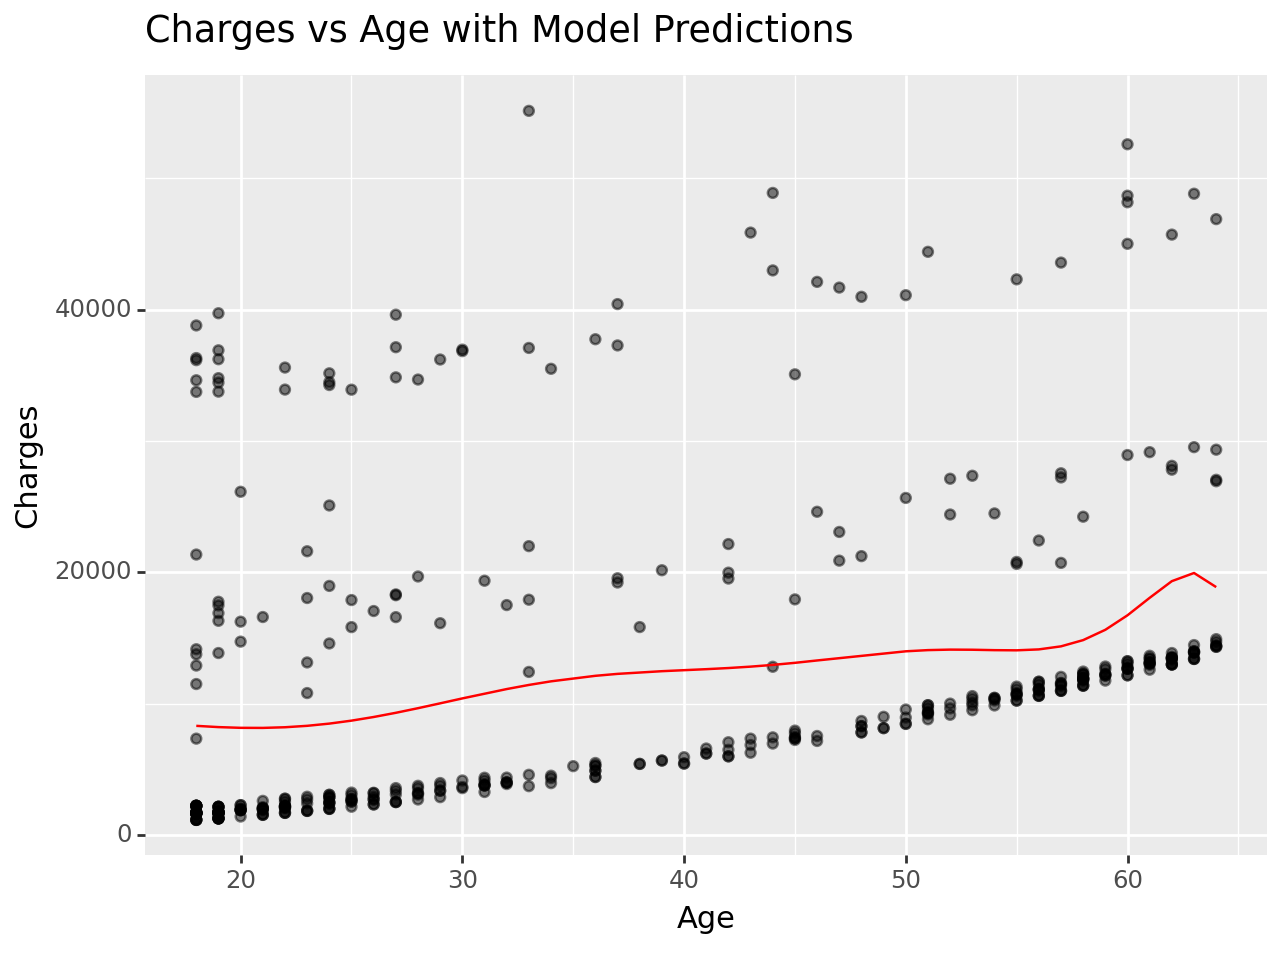

<Figure Size: (640 x 480)>

In [ ]:
# Create the scatterplot with the line plot of predictions using plotnine
plot5 = (
    ggplot(data, aes(x='age', y='charges')) +
    geom_point(alpha=0.5) +
    geom_line(aes(x='age', y='y_preds7'), data=test_data, color='red') +
    labs(title='Charges vs Age with Model Predictions', x='Age', y='Charges')
)
plot5

# Part Four: New data

In [ ]:
new_data = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
new_data = pd.DataFrame(new_data)
new_data.head(1)
# new data itself acts as a "test" dataset

,age,sex,bmi,smoker,region,charges
0,23,male,34.4,no,southwest,1826.843


In [ ]:
new_data = pd.get_dummies(new_data, columns=['sex', 'smoker', 'region'])
new_data.head(1)

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,23,34.4,1826.843,0,1,1,0,0,0,0,1


### Only age as a predictor.

In [ ]:
# Define X and y for the original data
X_original = data[["age"]]
y_original = data["charges"]

# Define X for the new data
X_new = new_data[["age"]]
y_new = new_data["charges"]


In [ ]:
# prepping your preprocessing
lr = LinearRegression()

In [ ]:
my_pipeline8 = Pipeline([("ols",lr)])

In [ ]:
fitted8 = my_pipeline8.fit(X_original, y_original)

In [ ]:
y_preds_new8 = fitted8.predict(X_new)

In [ ]:
mean_squared_error(y_new, y_preds_new8)

136077136.50195494

### age and bmi as a predictor

In [ ]:
# Define X and y for the original data
X_original = data[["age","bmi"]]
y_original = data["charges"]

# Define X for the new data
X_new = new_data[["age","bmi"]]
y_new = new_data["charges"]


In [ ]:
# prepping your preprocessing
lr = LinearRegression()

In [ ]:
my_pipeline9 = Pipeline([("ols",lr)])

In [ ]:
fitted9 = my_pipeline9.fit(X_original, y_original)

In [ ]:
y_preds_new9 = fitted9.predict(X_new)

In [ ]:
mean_squared_error(y_new, y_preds_new9)

132636406.1108129

### age, bmi, and smoker as predictors (no interaction terms)

In [ ]:
# Define X and y for the original data
X_original = data[["age","bmi","smoker_yes"]]
y_original = data["charges"]

# Define X for the new data
X_new = new_data[["age","bmi","smoker_yes"]]
y_new = new_data["charges"]


In [ ]:
# prepping your preprocessing
lr = LinearRegression()

In [ ]:
my_pipeline10 = Pipeline([("ols",lr)])

In [ ]:
fitted10 = my_pipeline10.fit(X_original, y_original)

In [ ]:
y_preds_new10 = fitted10.predict(X_new)

In [ ]:
mean_squared_error(y_new, y_preds_new10)

35377541.24141632

### age, and bmi, with both quantitative variables having an interaction term with smoker

In [ ]:
# Define X and y for the original and new data
X_original = data[["age", "bmi"]]
X_original['age_smoker'] = X_original['age'] * X_original['smoker_yes']
X_original['bmi_smoker'] = X_original['bmi'] * X_original['smoker_yes']

In [ ]:
X_new = new_data[["age", "bmi"]]
X_new['age_smoker'] = X_new['age'] * X_new['smoker_yes']
X_new['bmi_smoker'] = X_new['bmi'] * X_new['smoker_yes']

<ipython-input-31-cb13f1507a7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-31-cb13f1507a7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# prepping your preprocessing
lr = LinearRegression()

In [ ]:
my_pipeline11 = Pipeline([("ols",lr)])

In [ ]:
fitted11 = my_pipeline11.fit(X_original, y_original)

In [ ]:
y_preds_new11 = fitted11.predict(X_new)

In [ ]:
mean_squared_error(y_new, y_preds_new11)

47626025.35814417

### age, bmi, and smoker as predictors, with both quantitative variables having an interaction term with smoker

In [ ]:
# Define X and y for the original and new data
X_original = data[["age", "bmi", "smoker_yes"]]
X_original['age_smoker'] = X_original['age'] * X_original['smoker_yes']
X_original['bmi_smoker'] = X_original['bmi'] * X_original['smoker_yes']

<ipython-input-44-f9e4d7ab7dbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-44-f9e4d7ab7dbe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Use the fitted model to predict on the new data
X_new = new_data[["age", "bmi", "smoker_yes"]]
X_new['age_smoker'] = X_new['age'] * X_new['smoker_yes']
X_new['bmi_smoker'] = X_new['bmi'] * X_new['smoker_yes']

<ipython-input-45-69d80acc9b06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-45-69d80acc9b06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# prepping your preprocessing
lr = LinearRegression()

In [ ]:
my_pipeline12 = Pipeline([("ols", lr)])

In [ ]:
fitted12 = my_pipeline12.fit(X_original, y_original)

In [ ]:
y_preds_new12 = fitted12.predict(X_new)

In [ ]:
mean_squared_error(y_new, y_preds_new12)

21786256.86685252

Plot of the best model:

In [ ]:
# Use the fitted model 12 to predict on the new data
y_preds_new12 = fitted12.predict(X_new)

In [ ]:
# Calculate the residuals
residuals = y_new - y_preds_new12

In [ ]:
# Create a DataFrame for the plot
plot_data = pd.DataFrame({'Predicted Values': y_preds_new12, 'Residuals': residuals})
plot_data

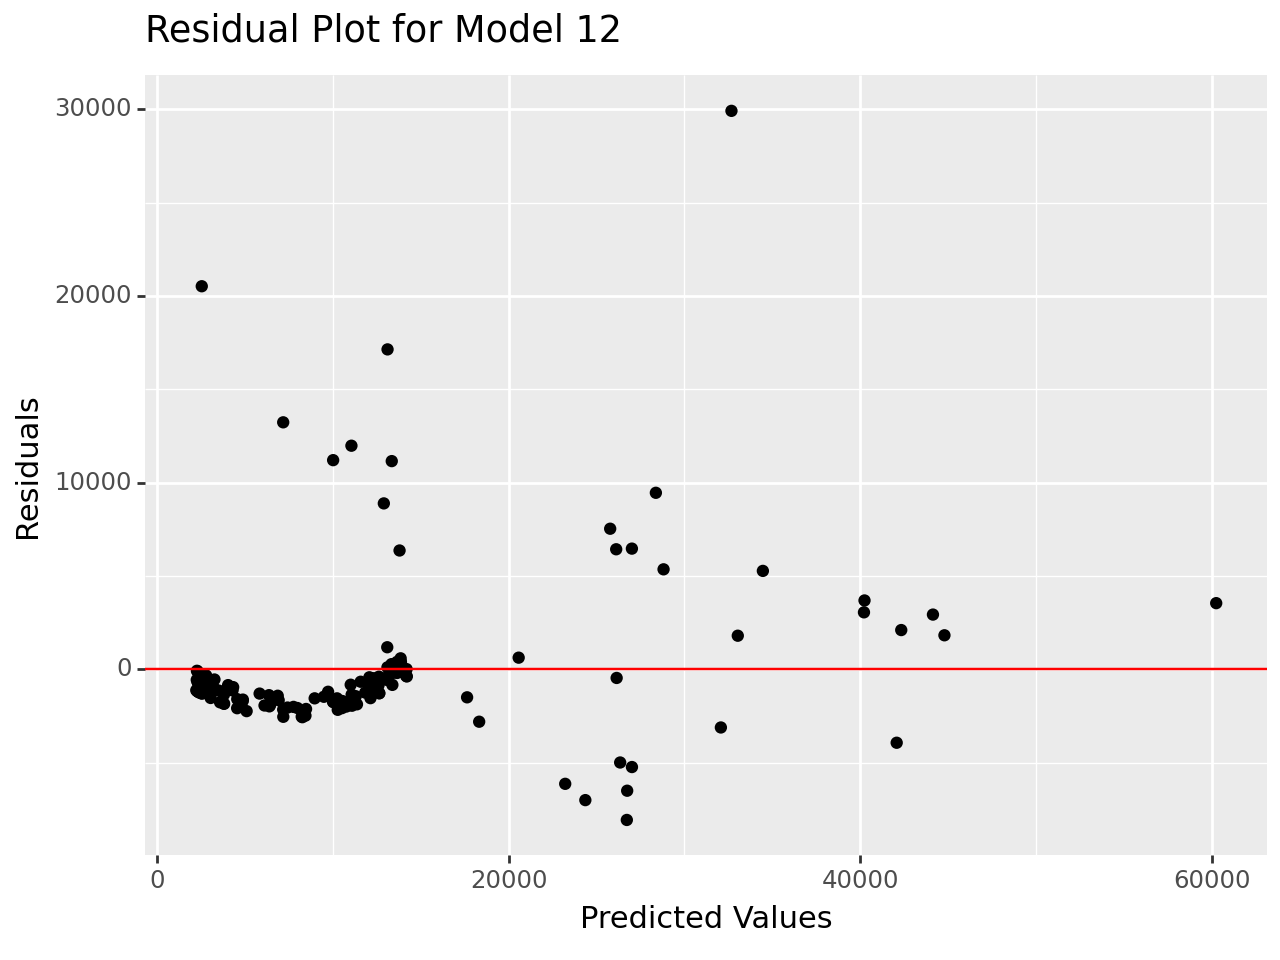

<Figure Size: (640 x 480)>

In [ ]:
plot = (ggplot(plot_data, aes(x='Predicted Values', y='Residuals')) +
        geom_point() +
        geom_hline(yintercept=0, color='red') +
        labs(title='Residual Plot for Model 12', x='Predicted Values', y='Residuals'))

plot


# Part Five: Full Exploration

In [ ]:
# Define X and y for the original and new data
X_original = data[["age", "bmi", "smoker_yes", "sex_male"]]
X_original['age_squared'] = X_original['age'] ** 2
X_original['bmi_squared'] = X_original['bmi'] ** 2
X_original['bmi_smoker'] = X_original['bmi'] * X_original['smoker_yes']
X_original['sex_male_smoker'] = X_original['sex_male'] * X_original['smoker_yes']
X_original['bmi_sex_male'] = X_original['bmi'] * X_original['sex_male']

y_original = data["charges"]

# Use the fitted model to predict on the new data
X_new = new_data[["age", "bmi", "smoker_yes", "sex_male"]]
X_new['age_squared'] = X_new['age'] ** 2
X_new['bmi_squared'] = X_new['bmi'] ** 2
X_new['bmi_smoker'] = X_new['bmi'] * X_new['smoker_yes']
X_new['sex_male_smoker'] = X_new['sex_male'] * X_new['smoker_yes']
X_new['bmi_sex_male'] = X_new['bmi'] * X_new['sex_male']

y_new = new_data["charges"]

<ipython-input-93-67bd90447fe3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-93-67bd90447fe3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-93-67bd90447fe3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-93-67bd90447fe3>

In [ ]:
my_pipelin_best = Pipeline([("ols", lr)])

In [ ]:
fitted_best = my_pipelin_best.fit(X_original, y_original)

In [ ]:
y_preds_best = fitted_best.predict(X_new)

In [ ]:
mean_squared_error(y_new, y_preds_best)

21608350.002490133

In [ ]:
r2_score(y_new, y_preds_best)

0.8606360968880402

**PLOT**

In [ ]:
# Calculate the residuals
residuals_best = y_new - y_preds_best

In [ ]:
plot_data_best = pd.DataFrame({'Predicted Values': y_preds_best, 'Residuals': residuals_best})

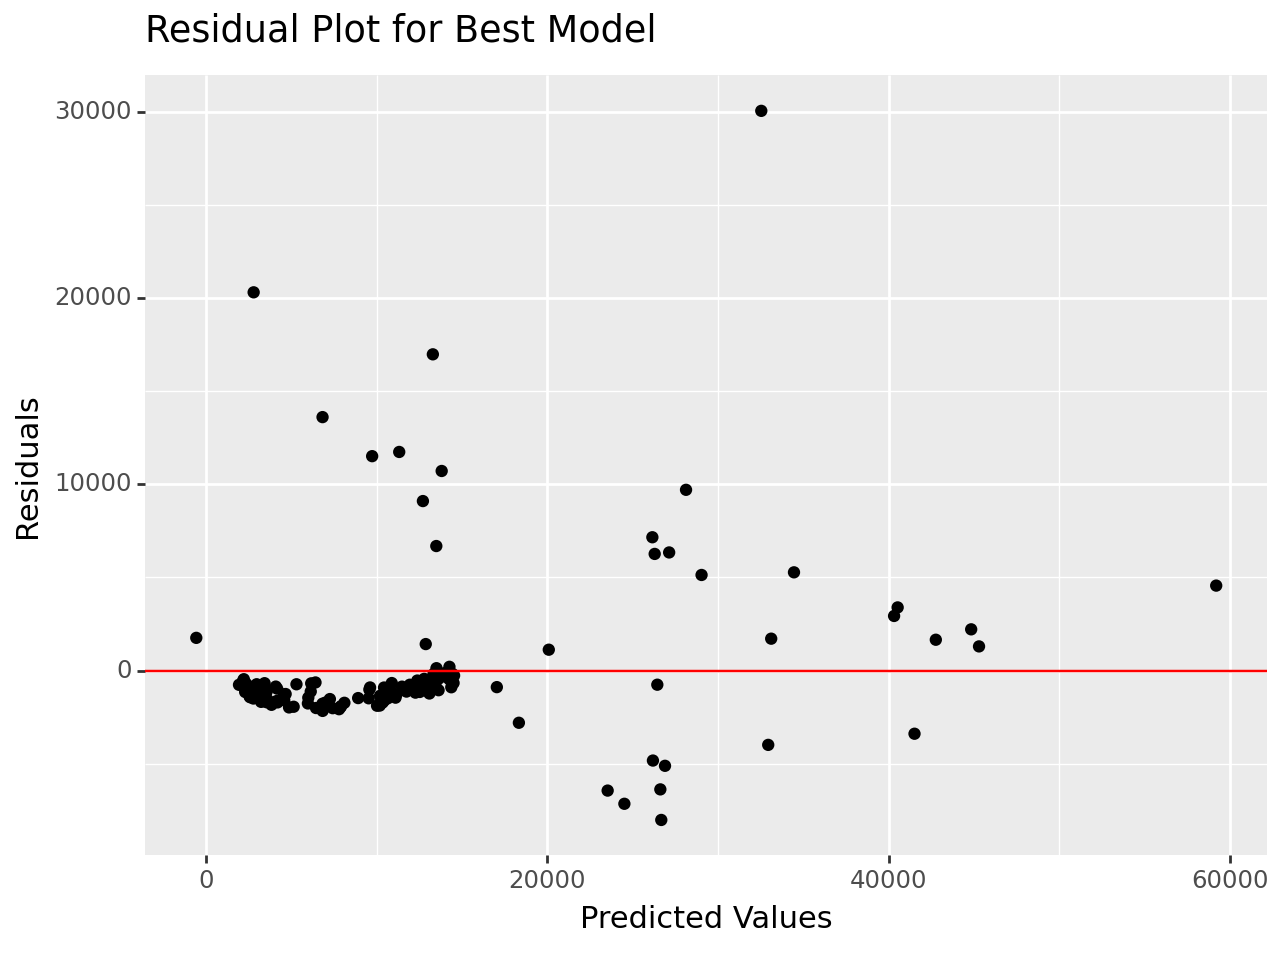

<Figure Size: (640 x 480)>

In [ ]:
plot_best = (ggplot(plot_data_best, aes(x='Predicted Values', y='Residuals')) +
        geom_point() +
        geom_hline(yintercept=0, color='red') +
        labs(title='Residual Plot for Best Model', x='Predicted Values', y='Residuals'))
plot_best